# Урок 1. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [4]:
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
import pandas as pd
df = pd.read_csv('Titanic_prepared.csv')

target = df['Survived']
X = df.drop(['Survived', 'Unnamed: 0'], axis='columns')

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    target,
                                                    test_size=0.25,
                                                    random_state=17)
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm

X_train shape: (668, 7), y_train shape: (668,),
X_test shape: (223, 7), y_test shape: (223,)


array([[112,  19],
       [ 26,  66]], dtype=int64)

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,1
888,3,1,27.0,1,2,23.4500,1
889,1,0,26.0,0,0,30.0000,2


$$
F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall}
$$

the count of true negatives is $C_{00}$, false negatives is $C_{10}$, true positives is $C_{11}$ and false positives is $C_{01}$. <br>
recall: TP/(TP + FN)
precision: TP/(TP + FP)

In [8]:
def my_f1_score(conf_matrix, beta=1):
    precision = conf_matrix[1][1]/(conf_matrix[1][1] + conf_matrix[0][1])
    recall = conf_matrix[1][1]/(conf_matrix[1][1] + conf_matrix[1][0])
    return (1 + beta**2)*precision * recall/(beta**2*precision + recall)

In [9]:
my_f1_score(dtc_cm)

0.7457627118644068

In [10]:
f1_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
(precision_score(y_test, y_pred) + recall_score(y_test, y_pred))/2

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

### Сравнение среднего арифметического и f1
В целом разница небольшая. Так как и precision и recall не близки к нулю

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [ ]:
print(classification_report(y_test, dtc_pred))
print('-------------')
precision_recall_fscore_support(y_test, dtc_pred)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print(classification_report(y_test, knn_pred))
print('-------------')
precision_recall_fscore_support(y_test, knn_pred)

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

print(classification_report(y_test, nb_pred))
print('-------------')
precision_recall_fscore_support(y_test, nb_pred)

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print(classification_report(y_test, lr_pred))
print('-------------')
precision_recall_fscore_support(y_test, lr_pred)

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [33]:
#skf = StratifiedKFold(n_splits=5, random_state=17)
skf = StratifiedKFold(n_splits=5, random_state=None) #так как shuffle = False

logspace = np.logspace(-4, 1, num=500, base=2)
lr_cv = LogisticRegressionCV(Cs=linspace,
                    cv=skf,
                    scoring="roc_auc",
                    max_iter=1000,
                    random_state=17) # увеличила количество итераций, так как для некоторых вариантов модель не могла обучиться
lr_cv_model = lr_cv.fit(x_train, y_train)

In [34]:
logspace

array([0.0625    , 0.0629356 , 0.06337423, 0.06381592, 0.06426068,
       0.06470855, 0.06515954, 0.06561367, 0.06607097, 0.06653145,
       0.06699515, 0.06746207, 0.06793225, 0.06840571, 0.06888246,
       0.06936254, 0.06984597, 0.07033276, 0.07082295, 0.07131655,
       0.0718136 , 0.0723141 , 0.0728181 , 0.07332561, 0.07383665,
       0.07435126, 0.07486945, 0.07539126, 0.0759167 , 0.07644581,
       0.0769786 , 0.0775151 , 0.07805535, 0.07859936, 0.07914716,
       0.07969878, 0.08025424, 0.08081358, 0.08137681, 0.08194397,
       0.08251508, 0.08309017, 0.08366927, 0.08425241, 0.08483961,
       0.0854309 , 0.08602631, 0.08662588, 0.08722962, 0.08783757,
       0.08844976, 0.08906621, 0.08968696, 0.09031204, 0.09094147,
       0.09157529, 0.09221353, 0.09285621, 0.09350338, 0.09415506,
       0.09481127, 0.09547206, 0.09613746, 0.09680749, 0.0974822 ,
       0.0981616 , 0.09884574, 0.09953465, 0.10022836, 0.10092691,
       0.10163032, 0.10233864, 0.10305189, 0.10377012, 0.10449

In [20]:
# не очень поняла отличия между использованием просто cv=5 и использованием StratifiedKFold

lr_cv_1 = LogisticRegressionCV(Cs=logspace, cv=5, scoring="roc_auc", random_state=17)
lr_cv_model_1 = lr_cv.fit(x_train, y_train)

In [21]:
lr_cv_model_1.scores_[1].shape

(5, 500)

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [36]:
import matplotlib.pyplot as plt

In [37]:
lr_cv_model.scores_[1].shape

(5, 500)

In [38]:
lr_cv_model.scores_[1]

array([[0.75464286, 0.75488095, 0.75464286, ..., 0.80988095, 0.80988095,
        0.80988095],
       [0.68392857, 0.68416667, 0.68464286, ..., 0.87821429, 0.87821429,
        0.87821429],
       [0.6547619 , 0.65619048, 0.65619048, ..., 0.83880952, 0.83904762,
        0.83904762],
       [0.74987952, 0.74963855, 0.75012048, ..., 0.88843373, 0.88843373,
        0.88843373],
       [0.75698795, 0.75771084, 0.7586747 , ..., 0.83      , 0.83      ,
        0.83      ]])

In [39]:
scores = np.mean(lr_cv_model.scores_[1], axis=0)
scores.shape

(500,)

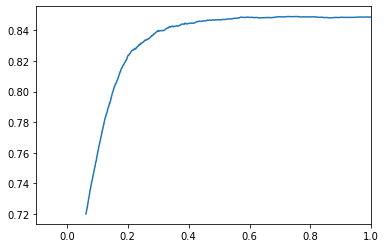

In [40]:
plt.xticks = logspace
plt.xlim((-0.1, 1))
plt.plot(logspace, scores)

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

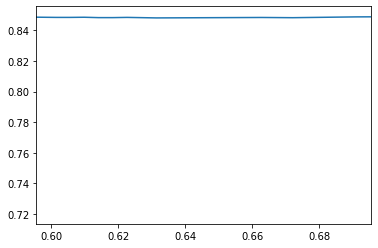

In [41]:
lr_cv_model.C_
plt.xlim((lr_cv_model.C_[0] - 0.05, lr_cv_model.C_[0] + 0.05))
plt.plot(logspace, scores)

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

In [46]:
# probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
# fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
# auc = roc_auc_score(y_train, probas[:, 1])
# plt.plot(fpr, tpr, label="auc=" + str(auc))
# plt.legend(loc=4)

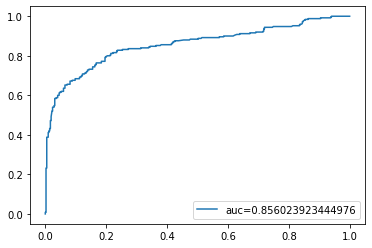

In [47]:
probas = lr_cv_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)